In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

#p='/dls/i16/data/2019/mm21716-1/%i.nxs'
p='/dls/staging/dls/i16/data/2019/mm21716-1/%i.nxs'

plot_folder = '/dls/science/users/spc93/plots/'
plot_type = 'png'

=== Importing dlstools package


## Proposal MM21716

Visit Id MM21716-1

Title Quadrupolar X-ray Magnetic Circular Dichroism using Superchiral X-rays
Summary Superchiral light can retrieve electronic properties of matter that are invisible with traditional, classical spectroscopies. By generating precisely sculpted optical beams, coupling to chiral properties can be enhanced dramatically [1]. Our studies show that the x-ray standing-wave field in diffraction, with circularly polarized light, is an x-ray manifestation of superchiral light [2]. Notably, the corresponding spectroscopy is found to be intimately related to Borrmann spectroscopy, where we have demonstrated very strong enhancement of quadrupole absorption (E2-E2) [3, 4]. Here, we aim to demonstrate an enhancement of E2-E2 contributions to x-ray magnetic circular dichroism (XMCD) in crystals of YIG and HoIG. A successful experiment will yield valuable data to assist the theoretical interpretation of (hard) x-ray XMCD, and provide a stimulating link to classical optics.
Start Date 2019-09-15
End Date 2019-09-17

METATABS.SAMPLE.NAME Holmium iron garnet
METATABS.SAMPLE.NAME Yttrium iron garnet

Investigator Prof Steve Collins
Investigator Dr Jun Kokubun
Investigator Prof Stephen Lovesey
Investigator Mr Joel Collins

saturation field ????????????????????? 

go to ho l3 8.071

energy.si()

basic alignment (base_y, z)

orientate crystal (008 only - trialub)

fluo spectrum

standing wave contrast at fluo peak 0016

 

get lam/3 through:

0. scan x 1 1 1

1. go to 2.7 keV energy.monogap=14 harmonic 3 (single move)

2. check beam and align (move qsys table up by increase in base_z value)

3. go to 8.071 with 'pos dcmharmonic 3'

4. check and align beam

5. record reduction in flux fom si 111

6. check HoIG 008

7. check wave contrast at fluo peak 0016: larger?

8. do wide scan to check it's the right peak (night?)

 

decide on Si 111 or Si 333 and set up

 

find phase plate crystal position

find phase plate crystal angle

 

scan over sample surface to find best part (night?)

 

re-align and redo UB for eta=90

 

mount magnet and power supply

 

set up V-F and struck for ion chamber

 

set pil3 threshold to remove Fe K fluo (Fe K 7.112 Fe Ka = 6.4; Ho La1=6.72 - try 6.5 keV)

test xmcd measurement (flipper or 2d scan?)

 

check synchronized - connect flipper ttl to fast shutter - should see 100% intensity change

 

set up cooler/epics

measure xmcd at low temp

measure vs temp

 

low temp: measure vs l (hkl l value) across standing wave...

 

/dls_sw/i16/software/python/dlstools/pdnx.py:74: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self,'nx',_nx)


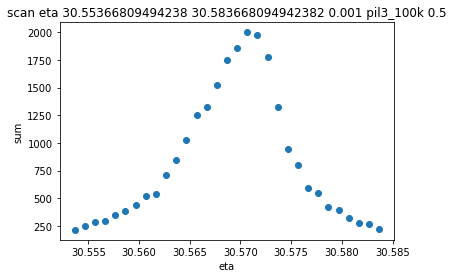

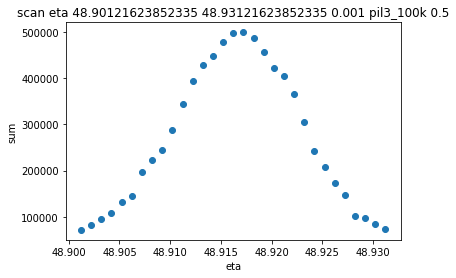

In [2]:
n=pdnx(p % 789517) #008
n.nx.plot()
n=pdnx(p % 789520) #0012
n.nx.plot()

Text(0.5, 1.0, 'Ho fluo pil3_thresh = 4.0, 6.5, 6.6, 7.0')

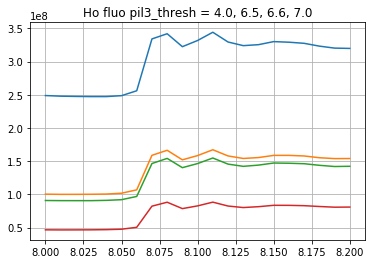

In [3]:
figure()
for scan in [789521, 789522, 789524, 789525]:
    n=pdnx(p % scan)
    plot(n.energy2, n['sum'])
grid(1)
title('Ho fluo pil3_thresh = 4.0, 6.5, 6.6, 7.0')
#use 6.5 keV

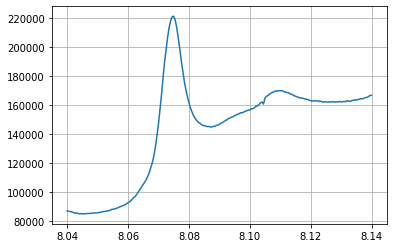

In [4]:
figure()
n=pdnx(p % 789526)
n['norm']=n['sum']/n.ic1monitor
plot(n.energy2, n.norm)
grid(1)



Text(0.5, 1.0, '0012 lam/3 vs lam')

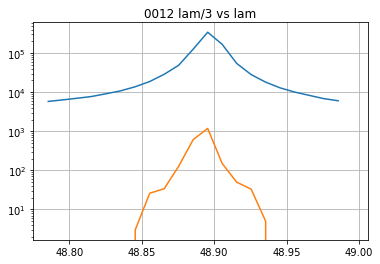

In [5]:
figure()
for scan in [789552, 789569]:
#for scan in [789569]:
    n=pdnx(p % scan)
    plot(n.eta, n['sum'])
grid(1)
yscale('log')
title('0012 lam/3 vs lam')


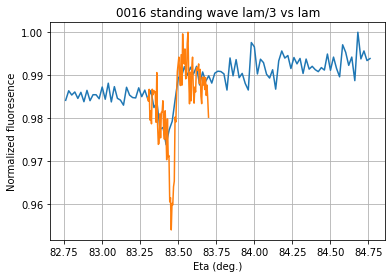

In [6]:
figure()
for scan in [789530, 789572]:
    n=pdnx(p % scan)
    plot(n.eta, n['sum']/max(n['sum']))
grid(1)
xlabel('Eta (deg.)')
ylabel('Normalized fluoresence')
title('0016 standing wave lam/3 vs lam')
plot_name = 'standing_wave_lam_lam_3'
savefig(plot_folder+plot_name+'.'+plot_type, bbox_inches='tight')

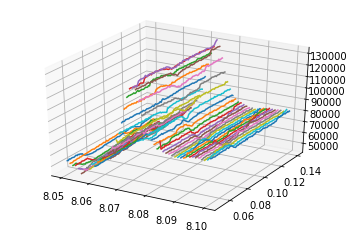

In [7]:
figure()
for scan in range(789579, 789629+1):
    n=pdnx(p % scan)
    n['energy']=float(n.nx.entry1.sample.beam.incident_energy)
    gca(projection='3d').plot(n.energy, n.h, n['sum'])
#xlabel('sy'); ylabel('eta'); title('eta scans vs sy')
#n.nx.entry1.instrument.energy.DCMenergy

(0, 1)

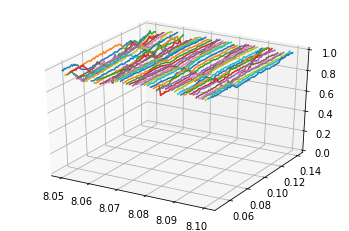

In [8]:
figure()
for scan in range(789579, 789629+1):
    n=pdnx(p % scan)
    n['energy']=float(n.nx.entry1.sample.beam.incident_energy)
    norm_cts = (n['sum']/n.ic1monitor)/max(n['sum']/n.ic1monitor)
    gca(projection='3d').plot(n.energy, n.h, n['sum']/max(n['sum']))
gca().set_zlim(0,1)
#xlabel('sy'); ylabel('eta'); title('eta scans vs sy')
#n.nx.entry1.instrument.energy.DCMenergy

Text(0.5, 0.92, 'eta scans vs sz')

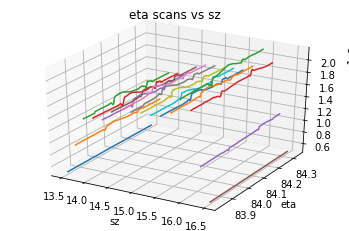

In [9]:
figure()
for scan in range(789646, 789661+1):
    n=pdnx(p % scan)
    n['sz']=float(n.nx.entry1.before_scan.positions.sz)
    #norm_cts = (n['sum']/n.ic1monitor)/max(n['sum']/n.ic1monitor)
    gca(projection='3d').plot(n.sz, n.eta, n['sum'])
#gca().set_zlim(0,1)
xlabel('sz'); ylabel('eta'); title('eta scans vs sz')

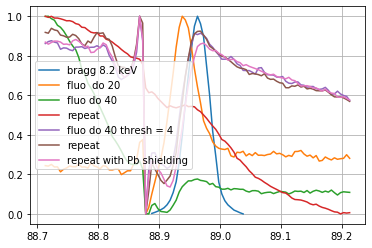

In [10]:
def norm01(x):
    return  (x-max(x)) / (max(x)-min(x)) + 1

figure()
n=pdnx(p % 789686) 
plot(n.eta, norm01(n['sum']),label='bragg 8.2 keV')
n=pdnx(p % 789687) 
plot(n.eta, norm01(n['sum']),label='fluo  do 20')
n=pdnx(p % 789688) 
plot(n.eta, norm01(n['sum']),label='fluo do 40')
n=pdnx(p % 789689)
plot(n.eta, norm01(n['sum']),label='repeat')
n=pdnx(p % 789694) 
plot(n.eta, norm01(n['sum']),label='fluo do 40 thresh = 4')
n=pdnx(p % 789695) 
plot(n.eta, norm01(n['sum']),label='repeat')
n=pdnx(p % 789696) 
plot(n.eta, norm01(n['sum']),label='repeat with Pb shielding')
grid(1); legend()



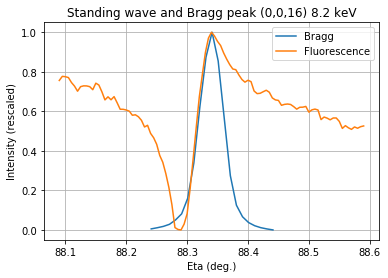

In [11]:
def norm01(x):
    return  (x-max(x)) / (max(x)-min(x)) + 1

figure()
n=pdnx(p % 789703) 
plot(n.eta, norm01(n['sum']),label='Bragg')
n=pdnx(p % 789704)
#do = 40
plot(n.eta, norm01(n['sum']),label='Fluorescence')

grid(1); legend()
title('Standing wave and Bragg peak (0,0,16) 8.2 keV')
xlabel('Eta (deg.)')
ylabel('Intensity (rescaled)')
plot_name = 'standing_wave_and_bragg_8p2keV'
savefig(plot_folder+plot_name+'.'+plot_type, bbox_inches='tight')

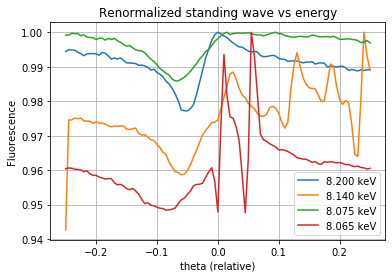

In [12]:
def norm01(x):
    return  (x-max(x)) / (max(x)-min(x)) + 1

def norm1(x):
    return  x / max(x)

figure()
#for scan in range(789704,789709+1):
for scan in [789704, 789705, 789707, 789708]:   
    n=pdnx(p % scan)
    plot(n.eta-np.mean(n.eta), norm1(n['sum']),label='%.3f keV' % n.nx.entry1.sample.beam.incident_energy)
legend(); title('Renormalized standing wave vs energy')
xlabel('theta (relative)'); ylabel('Fluorescence'); grid(1)
plot_name = 'standing_wave_vs_energy'
savefig(plot_folder+plot_name+'.'+plot_type, bbox_inches='tight')

In [13]:
#print n.nx.tree
#n.find('incident_energy')
print('%.3f keV' % n.nx.entry1.sample.beam.incident_energy)

8.065 keV


Text(0.5, 1.0, 'scan ppa111_1 [8.075000872641523, -0.02503050840000185] [8.075000872641523, 0.024969491599998152] [0, 0.001] Waittime 1 QBPM6')

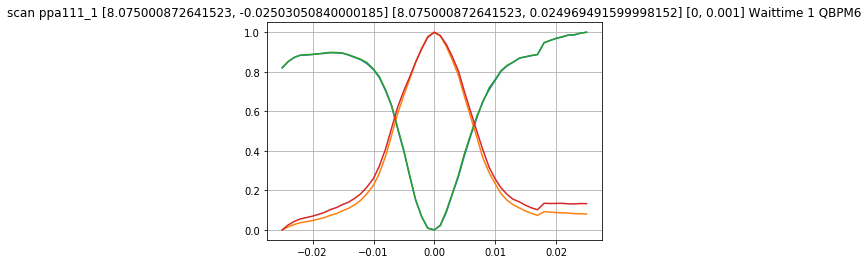

In [14]:
def norm01(x):
    return  (x-max(x)) / (max(x)-min(x)) + 1

figure()
n=pdnx(p % 789718) 
plot(n.ppp_offset, norm01(n.C1))
plot(n.ppp_offset, norm01(n.C2))
plot(n.ppp_offset, norm01(n.C3))
plot(n.ppp_offset, norm01(n.C4))
grid(1)
title(n.nx.entry1.title)

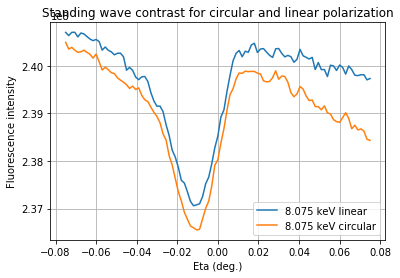

In [15]:
figure()
n=pdnx(p % 789722) 
plot(n.k, n['sum'], label='8.075 keV linear')
n=pdnx(p % 789723) 
plot(n.k, n['sum'], label='8.075 keV circular')
#title(n.nx.entry1.title)
title('Standing wave contrast for circular and linear polarization')
grid(1); legend()
xlabel('Eta (deg.)')
ylabel('Fluorescence intensity')
plot_name = 'standing_wave_circ_lin'
savefig(plot_folder+plot_name+'.'+plot_type, bbox_inches='tight')

In [16]:
n.find('title')

.nx.entry1.title : 	 scan k -0.07499999999986233 0.07500000000013766 0.0015 pil3_100k 1


(0.8, 1)

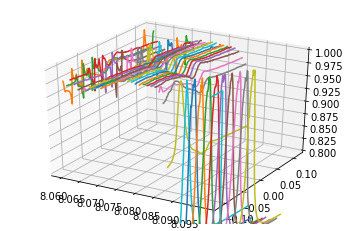

In [17]:
figure()
for scan in range(789722, 789801+1, 2):
    n=pdnx(p % scan)
    n['energy']=float(n.nx.entry1.sample.beam.incident_energy)
    norm_cts = (n['sum']/n.ic1monitor)/max(n['sum']/n.ic1monitor)
    #gca(projection='3d').plot(n.energy,n['sum']/n.ic1monitor)
    gca(projection='3d').plot(n.energy, n.k, n['sum']/max(n['sum']))
    
gca().set_zlim(.8,1)
#xlabel('sy'); ylabel('eta'); title('eta scans vs sy')
#n.nx.entry1.instrument.energy.DCMenergy

Text(0.5, 1.0, 'scan ppa111_1 [8.075003663217405, -0.025005926928189127] [8.075003663217405, 0.024994073071810875] [0, 0.001] Waittime 1 QBPM6')

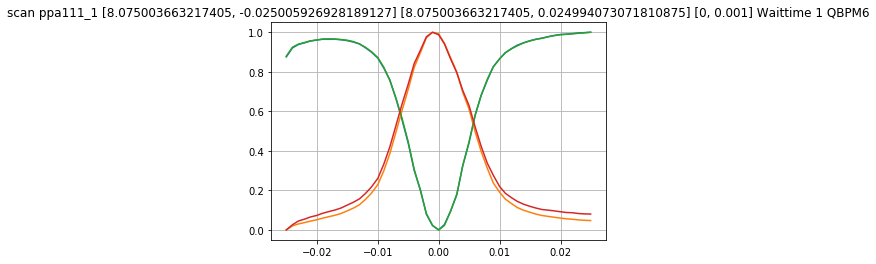

In [18]:
def norm01(x):
    return  (x-max(x)) / (max(x)-min(x)) + 1

figure()
n=pdnx(p % 789845) 
plot(n.ppp_offset, norm01(n.C1))
plot(n.ppp_offset, norm01(n.C2))
plot(n.ppp_offset, norm01(n.C3))
plot(n.ppp_offset, norm01(n.C4))
grid(1)
title(n.nx.entry1.title)

scan mag_flipper [5, 1, 10] [-5, 1, 10] [-1, 0, 0]
scan mag_flipper [5, 1, 10] [-5, 1, 10] [-1, 0, 0]


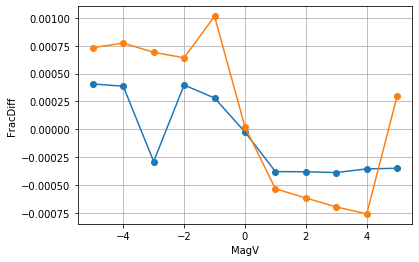

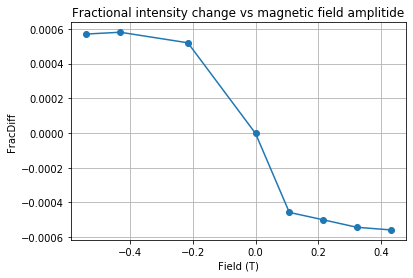

In [19]:
#logbook p -5V = +1.5 A = 0.54 T
#B ~ 0.54/5 * V

figure()
n=pdnx(p % 789846) 
plot(n.magvolts, n.fracdiff,'o-')
print(n.nx.entry1.title)
f1 = n.fracdiff
n=pdnx(p % 789857)
plot(n.magvolts, n.fracdiff,'o-')
print(n.nx.entry1.title)
f2 = n.fracdiff
xlabel('MagV')
ylabel('FracDiff')
grid(1)

B, Fracdiff = [], []
for i in range(len(f1)):
    if abs(f1[i] - f2[i]) < 0.0005: #ignore data points that are very different
        B += [n.magvolts[i] * 0.54/5]
        Fracdiff += [(f1[i] + f2[i])/2]
figure()
plot(B, Fracdiff,'o-')
title('Fractional intensity change vs magnetic field amplitide')
xlabel('Field (T)')
ylabel('FracDiff')
grid(1)

plot_name = 'B_dep'
savefig(plot_folder+plot_name+'.'+plot_type, bbox_inches='tight')


In [20]:
print(n.find('Ta'))
print(n.find('en'))



.nx.entry1.before_scan.lakeshore.Ta : 	 20.555
None
.nx.entry1.before_scan.diffractometer_sample.en : 	 8.07500087264
.nx.entry1.before_scan.mono.en : 	 8.07500087264
None


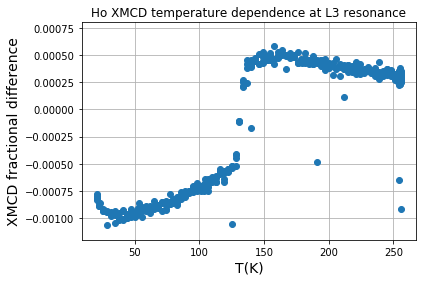

In [21]:
#%matplotlib inline
#%matplotlib nbagg
figure()
n=pdnx(p % 789859) 
plot(n.Ta, n.fracdiff,'o')
grid(1)
xlabel('T(K)', FontSize=14); ylabel('XMCD fractional difference', FontSize=14); ylim([-.0012, 0.0008])
title('Ho XMCD temperature dependence at L3 resonance')

plot_name = 'tcomp'
savefig(plot_folder+plot_name+'.'+plot_type, bbox_inches='tight')


In [22]:
print(n.find('en'))
#print(n.nx.tree)

.nx.entry1.before_scan.diffractometer_sample.en : 	 8.07499808207
.nx.entry1.before_scan.mono.en : 	 8.07499808207
None


In [23]:
n

,Ta,Time,TimeFromEpoch,TimeSec,Tset,beamOK,counttime,delta_axis_offset,filenum,fracdiff,ic1monitor,ic1ratio,kap,kdelta,kgam,kmu,kphi,kth,magvolts,ncycles,norm_diff,norm_sum,rc,x
0,20.715,3.011077,1.568831e+09,18892.637057,20.0,1.0,1.0,8.8,0.0,-0.000832,496.842716,0.999996,-5.421416,100.000001,-0.000031,0.000002,4.296,94.016188,3.0,4.0,-1266.379808,1.522232e+06,302.070648,1.0
1,20.723,2.599726,1.568831e+09,18954.622027,20.0,1.0,1.0,8.8,0.0,-0.000783,495.998901,0.999982,-5.421416,99.999999,-0.000031,0.000002,4.296,94.016188,3.0,4.0,-1191.906899,1.522403e+06,301.523926,2.0
2,20.734,2.912632,1.568831e+09,19032.238227,20.0,1.0,1.0,8.8,0.0,-0.000797,494.837281,1.000015,-5.421416,99.999999,-0.000035,0.000002,4.296,94.016190,3.0,4.0,-1213.316611,1.521825e+06,300.831696,3.0
3,20.731,3.008166,1.568831e+09,19096.622429,20.0,1.0,1.0,8.8,0.0,-0.000814,494.010868,1.000013,-5.421416,99.999999,-0.000031,0.000002,4.296,94.016186,3.0,4.0,-1238.456027,1.521990e+06,300.303528,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,253.817,2.944402,1.568856e+09,43828.757322,299.0,1.0,1.0,8.8,0.0,0.000252,495.244840,1.000030,-5.421416,99.999999,-0.000027,0.000002,4.296,94.016203,3.0,4.0,379.119318,1.503272e+06,299.033997,1.0
373,254.203,2.970912,1.568856e+09,43892.624387,299.0,1.0,1.0,8.8,0.0,0.000341,494.314629,0.999989,-5.421416,99.999999,-0.000035,0.000002,4.296,94.016182,3.0,4.0,512.048424,1.503179e+06,298.500244,2.0
374,254.306,2.900016,1.568856e+09,43957.948021,299.0,1.0,1.0,8.8,0.0,0.000284,493.383807,0.999990,-5.421416,100.000001,-0.000031,0.000002,4.296,94.016186,3.0,4.0,427.304332,1.502850e+06,297.931732,3.0
375,254.311,22.675619,1.568856e+09,44041.314851,299.0,1.0,1.0,8.8,0.0,0.001301,500.245451,0.995775,-5.421416,99.999999,-0.000031,0.000002,4.296,94.016182,3.0,4.0,1957.594168,1.504314e+06,302.315063,4.0


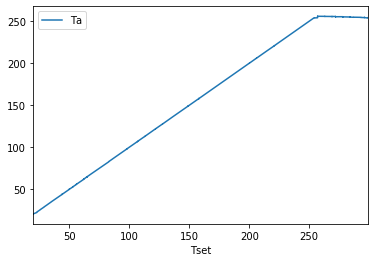

In [24]:
n.plot('Tset', 'Ta')

Text(0.5, 1.0, 'Mystery diamond reflection A')

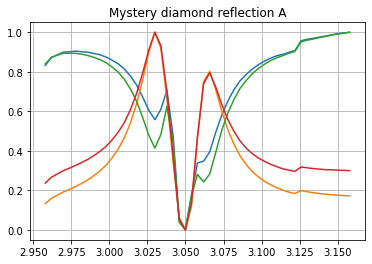

In [25]:
def norm01(x):
    return  (x-max(x)) / (max(x)-min(x)) + 1

figure()
n=pdnx(p % 789868) 
plot(n.ppp_offset, norm01(n.C1))
plot(n.ppp_offset, norm01(n.C2))
plot(n.ppp_offset, norm01(n.C3))
plot(n.ppp_offset, norm01(n.C4))
grid(1)
title(n.nx.entry1.title)
title('Mystery diamond reflection A')

Text(0.5, 1.0, 'Diamond reflection B cal 8.12 keV')

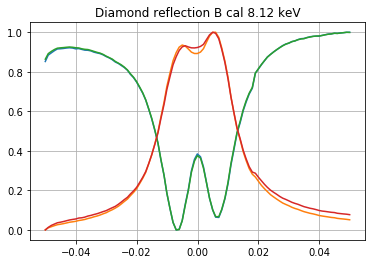

In [26]:
def norm01(x):
    return  (x-max(x)) / (max(x)-min(x)) + 1

figure()
n=pdnx(p % 789873) 
plot(n.ppp_offset, norm01(n.C1))
plot(n.ppp_offset, norm01(n.C2))
plot(n.ppp_offset, norm01(n.C3))
plot(n.ppp_offset, norm01(n.C4))
grid(1)
title(n.nx.entry1.title)
title('Diamond reflection B cal 8.12 keV')

Text(0.5, 1.0, 'Diamond reflection B cal 8.12 keV')

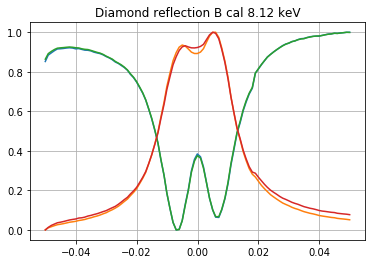

In [27]:
def norm01(x):
    return  (x-max(x)) / (max(x)-min(x)) + 1

figure()

plot(n.ppp_offset, norm01(n.C1))
plot(n.ppp_offset, norm01(n.C2))
plot(n.ppp_offset, norm01(n.C3))
plot(n.ppp_offset, norm01(n.C4))
grid(1)
title(n.nx.entry1.title)
title('Diamond reflection B cal 8.12 keV')

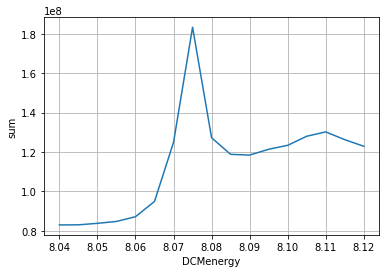

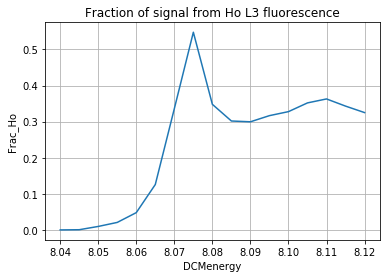

In [28]:
n=pdnx(p % 789816)
#subplot(2,1,1)
figure()
plot(n['DCMenergy'],n['sum']); grid(1); xlabel('DCMenergy'); ylabel('sum')
n['Frac_Ho'] = (n['sum']-min(n['sum']))/n['sum']
#subplot(2,1,2)
figure()
plot(n['DCMenergy'],n['Frac_Ho']); grid(1); xlabel('DCMenergy'); ylabel('Frac_Ho');title('Fraction of signal from Ho L3 fluorescence')
plot_name = 'FracHoL3'
savefig(plot_folder+plot_name+'.'+plot_type, bbox_inches='tight')

In [29]:
.033/.15

0.22000000000000003

0.014003002675821108 True
-0.014125742124178942 False
0.01386571487581989 True
-0.014125742124178942 False
0.013880969075820815 True
-0.014140996324179866 False
0.013880969075820815 True
-0.014140996324179866 False
0.013880969075820815 True
-0.014156250524180791 False
0.01389622327582174 True
-0.014156250524180791 False
0.013880969075820815 True
-0.014140996324179866 False
0.01389622327582174 True
-0.014156250524180791 False
0.01389622327582174 True
-0.014156250524180791 False


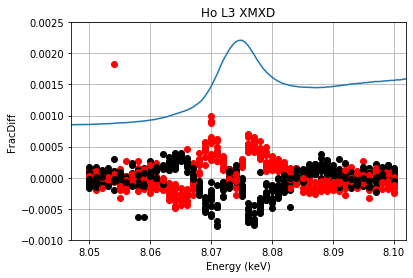

In [30]:
figure()

for scan in [789888]+list(range(789891,789908)):
    n=pdnx(p % scan)
    print(n.ppp_offset[0], n.ppp_offset[0]>0)
    if n.ppp_offset[0] > 0:
        plot(n.energy2, n.fracdiff,'ro')
    else:
        plot(n.energy2, n.fracdiff,'ko')


n=pdnx(p % 789526)
n['norm']=n['sum']/n.ic1monitor/1e8
plot(n.energy2, n.norm)
    
        
grid(1)
xlabel('Energy (keV)'); ylabel('FracDiff'); ylim([-.002, 0.002])
title('Ho L3 XMXD')
xlim([8.047, 8.102])
ylim([-0.001, 0.0025 ])
plot_name = 'XMCD'
savefig(plot_folder+plot_name+'.'+plot_type, bbox_inches='tight')

In [31]:
print(n.find('Ta'))
#print(n.nx.tree)
n = pdnx(p % 789891)
n

.nx.entry1.before_scan.lakeshore.Ta : 	 0.0
None


,DCMenergy,TimeFromEpoch,TimeSec,Uenergy,counttime,delta_axis_offset,energy2,filenum,fracdiff,ic1monitor,ic1ratio,kap,kdelta,kgam,kmu,kphi,kth,magvolts,ncycles,norm_diff,norm_sum,ppp_energy,ppp_offset,rc
0,8.049999,1.568914e+09,102241.461531,8.050096,1.0,8.8,8.050,0.0,0.000089,439.101538,1.000050,-5.421416,100.000001,-0.000031,0.000002,4.296,94.016207,3.0,4.0,44.251680,498781.333665,8.050,-0.014126,302.533234
1,8.051000,1.568914e+09,102294.670272,8.050898,1.0,8.8,8.051,0.0,0.000061,438.235132,1.000042,-5.421416,99.999999,-0.000035,-0.000002,4.296,94.016186,3.0,4.0,30.466588,499880.100652,8.051,-0.014019,302.096771
2,8.051996,1.568914e+09,102345.878677,8.051885,1.0,8.8,8.052,0.0,0.000020,437.170289,0.999999,-5.421416,99.999999,-0.000027,0.000002,4.296,94.016188,3.0,4.0,9.869441,501261.971541,8.052,-0.013941,301.640808
3,8.053001,1.568914e+09,102397.662991,8.052872,1.0,8.8,8.053,0.0,0.000149,436.486445,1.000044,-5.421416,99.999999,-0.000031,0.000002,4.296,94.016184,3.0,4.0,74.748573,502072.339446,8.053,-0.014014,301.229950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,8.096999,1.568917e+09,104796.679633,8.096831,1.0,8.8,8.097,0.0,-0.000044,431.721211,0.999955,-5.421416,99.999999,-0.000035,0.000002,4.296,94.016186,3.0,4.0,-32.872429,738936.244669,8.097,-0.013942,300.937622
48,8.098004,1.568917e+09,104848.718306,8.097950,1.0,8.8,8.098,0.0,-0.000032,431.310294,1.000115,-5.421416,99.999999,-0.000035,-0.000002,4.296,94.016209,3.0,4.0,-23.540614,739656.815858,8.098,-0.013951,300.504089
49,8.099001,1.568917e+09,104900.673839,8.098882,1.0,8.8,8.099,0.0,-0.000034,430.146538,1.000027,-5.421416,100.000001,-0.000031,0.000002,4.296,94.016184,3.0,4.0,-25.248951,740714.468432,8.099,-0.013944,300.083282
50,8.099995,1.568917e+09,104951.740330,8.099938,1.0,8.8,8.100,0.0,0.000077,429.811332,1.000113,-5.421416,99.999999,-0.000031,0.000002,4.296,94.016188,3.0,4.0,57.177424,742377.500692,8.100,-0.013995,299.642120


In [32]:

#check some raw images to see if the xmcd is really small

#for scan in [789888]+range(789891,789908):
#p='/dls/i16/data/2019/mm21716-1/%i.nxs'
#/dls/i16/data/2019/mm21716-1/snapped-data/pilatus3_100k

n=pdnx(p % 789888)
n
print(n.nx.entry1.before_scan.mrwolf.tree)
#find first tiff after this time
#load tiffs


import sys
sys.path.append('/dls_sw/i16/software/python')
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
from dlstools.pdnx import *
from matplotlib.pyplot import *
from dlstools.quickfit import *
#%matplotlib notebook 
#datadir='/dls/i16/data/2019/mt18003-4/'

datadir='/dls/i16/data/2019/mm21716-1/snapped-data/pilatus3_100k/%i.tif'

from dlstools import dataloader
from dlstools.dataloader import vec2mat
#d=dataloader.dlsloader(datadir+'%i.dat')
#pil=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus3_100k_path_template)
pil=dataloader.tiffloader(datadir)



mrwolf:NXcollection
  Day = 19.0
  Hours = 17.0
  Minutes = 4.0
  Month = 9.0
  Seconds = 47.0
  Year = 2019.0
=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/scisoftpy/_external/tifffile.py:8121: UserWarning: No module named 'scisoftpy._external._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn('%s%s' % (e, warn))
